In [2]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json
from pandas.io.json import json_normalize #package for flattening json in pandas df
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime

In [4]:
import os
os.getcwd()

'C:\\Users\\Rockwell\\Documents\\GitHub\\Demand-Response'

# 1. Deal with load data

## We can find that TOU has complete data in 2013

In [3]:
df_tou = pd.read_csv("C:\\Users\\Rockwell\\Desktop\\Paper4\\data_collection\\data_tables\\consumption_d.csv")
df_tou

,GMT,D0000,D0001,D0002,D0003,D0004,D0005,D0006,D0007,D0008,...,D1015,D1016,D1017,D1018,D1019,D1020,D1021,D1022,D1023,D1024
0,2011-11-23 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-11-23 09:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-11-23 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-11-23 10:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-11-23 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2011-11-23 11:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2011-11-23 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2011-11-23 12:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2011-11-23 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2011-11-23 13:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## We need to extract all the TOU load data in 2013

In [4]:
df_tou_2013 = df_tou.loc[df_tou['GMT'].str[0:4] == '2013'].reset_index(drop = True)
# Store the complete dataframe to a csv file
df_tou_2013.to_csv("C:\\Users\\Rockwell\\Desktop\\Paper4\\data_collection\\data_tables\\Consumption_tou2013.csv", index = False)
df_tou_2013

,GMT,D0000,D0001,D0002,D0003,D0004,D0005,D0006,D0007,D0008,...,D1015,D1016,D1017,D1018,D1019,D1020,D1021,D1022,D1023,D1024
0,2013-01-01 00:00:00,1.043,0.181,0.224,0.077,0.195,0.040,0.146,0.131,0.214,...,0.016,0.028,0.266,0.063,0.182,0.305,0.074,0.177,0.066,0.059
1,2013-01-01 00:30:00,0.404,0.248,0.227,0.078,0.202,0.066,0.161,0.137,0.176,...,0.032,0.005,0.236,0.054,0.196,0.838,0.081,0.166,0.110,0.058
2,2013-01-01 01:00:00,0.185,0.206,0.231,0.076,0.188,0.057,0.227,0.164,0.187,...,0.046,0.005,0.289,0.060,0.218,0.446,0.039,0.145,0.100,0.087
3,2013-01-01 01:30:00,0.151,0.171,0.236,0.077,0.039,0.052,0.138,0.136,0.341,...,0.016,0.005,0.239,0.057,0.181,0.410,0.059,0.133,0.234,0.040
4,2013-01-01 02:00:00,0.139,0.068,0.239,0.077,0.024,0.070,0.040,0.103,0.087,...,0.016,0.005,0.120,0.263,0.174,0.282,0.049,0.049,0.056,0.083
5,2013-01-01 02:30:00,0.105,0.083,0.251,0.077,0.102,0.038,0.020,0.094,0.063,...,0.016,0.005,0.097,0.047,0.188,0.239,0.034,0.039,0.106,0.053
6,2013-01-01 03:00:00,0.122,0.083,0.246,0.077,0.033,0.083,0.035,0.086,0.069,...,0.046,0.005,0.117,0.065,0.194,0.275,0.058,0.019,0.073,0.163
7,2013-01-01 03:30:00,0.091,0.072,0.334,0.076,0.024,0.026,0.032,0.081,0.082,...,0.016,0.006,0.089,0.054,0.174,0.195,0.055,0.042,0.054,0.084
8,2013-01-01 04:00:00,0.110,0.060,0.287,0.079,0.033,0.083,0.020,0.073,0.054,...,0.015,0.051,0.104,0.056,0.164,0.106,0.040,0.022,0.032,0.035
9,2013-01-01 04:30:00,0.100,0.061,0.292,0.077,0.028,0.024,0.036,0.071,0.079,...,0.046,0.045,0.378,0.062,0.190,0.140,0.057,0.036,0.007,0.039


In [5]:
# Now we compress the rows such that the frequency is 1 hour
# first let's delete the GMT index of matrix consists in odd rows
odd_df = df_tou_2013.loc[1::2].copy()
odd_df.loc[:, 'GMT'] = ''
# create the new dataframe that is the sum of odd and even rows
df_tou_2013_1h = (df_tou_2013[::2] + odd_df.values).reset_index(drop = True)
# store it to a csv file
df_tou_2013_1h.to_csv("C:\\Users\\Rockwell\\Desktop\\Paper4\\data_collection\\data_tables\\Consumption_tou2013_1h.csv", index = False)

## We can find that non-TOU has complete data in 2013

In [6]:
df_ntou = pd.read_csv("C:\\Users\\Rockwell\\Desktop\\Paper4\\data_collection\\data_tables\\consumption_n.csv")
df_ntou

,GMT,N0000,N0001,N0002,N0003,N0004,N0005,N0006,N0007,N0008,...,N4163,N4164,N4165,N4166,N4167,N4168,N4169,N4170,N4171,N4172
0,2011-11-23 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-11-23 09:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-11-23 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-11-23 10:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-11-23 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2011-11-23 11:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2011-11-23 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2011-11-23 12:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2011-11-23 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2011-11-23 13:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## We then extract all the non-TOU load data in 2013 

In [7]:
df_ntou_2013 = df_ntou.loc[df_ntou['GMT'].str[0:4] == '2013'].reset_index(drop = True)
df_ntou_2013.to_csv("C:\\Users\\Rockwell\\Desktop\\Paper4\\data_collection\\data_tables\\Consumption_Ntou2013.csv", index = False)
df_ntou_2013

,GMT,N0000,N0001,N0002,N0003,N0004,N0005,N0006,N0007,N0008,...,N4163,N4164,N4165,N4166,N4167,N4168,N4169,N4170,N4171,N4172
0,2013-01-01 00:00:00,0.306,0.117,0.018,0.140,0.090,0.369,0.000,0.077,0.170,...,0.125,0.003,0.044,0.010,0.338,0.099,0.028,0.152,0.054,0.081
1,2013-01-01 00:30:00,0.732,0.115,0.034,0.116,0.091,0.404,0.000,0.086,0.091,...,0.062,0.048,0.043,0.010,0.248,0.102,0.041,0.102,0.048,0.051
2,2013-01-01 01:00:00,0.250,0.152,0.051,0.092,0.092,0.245,0.000,0.082,0.047,...,0.132,0.014,0.042,0.020,0.263,0.093,0.034,0.055,0.082,0.092
3,2013-01-01 01:30:00,0.234,0.115,0.050,0.100,0.093,0.114,0.000,0.070,0.043,...,0.172,0.031,0.024,0.095,0.201,0.101,0.036,0.108,0.094,0.048
4,2013-01-01 02:00:00,0.214,0.114,0.048,0.100,0.108,0.059,0.000,0.085,0.096,...,0.214,0.011,0.042,0.215,0.072,0.114,0.040,0.053,0.096,0.084
5,2013-01-01 02:30:00,0.235,0.152,0.044,0.100,0.376,0.091,0.000,0.085,0.060,...,0.182,0.041,0.042,0.020,0.118,0.127,0.106,0.044,0.059,0.058
6,2013-01-01 03:00:00,0.182,0.116,0.017,0.133,0.059,0.077,0.000,0.072,0.039,...,0.181,0.056,0.028,0.010,0.095,0.097,0.182,0.073,0.047,0.077
7,2013-01-01 03:30:00,0.208,0.114,0.017,0.129,0.073,0.078,0.000,0.080,0.055,...,0.174,0.055,0.038,0.011,0.062,0.088,0.050,0.064,0.048,0.070
8,2013-01-01 04:00:00,0.318,0.153,0.016,0.120,0.092,0.091,0.000,0.086,0.075,...,0.167,0.097,0.042,0.010,0.060,0.218,0.038,0.044,0.047,0.056
9,2013-01-01 04:30:00,0.618,0.115,0.036,0.085,0.091,0.072,0.000,0.079,0.080,...,0.179,0.022,0.030,0.011,0.115,0.094,0.040,0.045,0.047,0.105


In [8]:
# Now we compress the rows such that the frequency is 1 hour
# first let's delete the GMT index of matrix consists in odd rows
odd_df_ntou = df_ntou_2013.loc[1::2].copy()
odd_df_ntou.loc[:, 'GMT'] = ''
# create the new dataframe that is the sum of odd and even rows
df_ntou_2013_1h = (df_ntou_2013[::2] + odd_df_ntou.values).reset_index(drop = True)
# store it to a csv file
df_ntou_2013_1h.to_csv("C:\\Users\\Rockwell\\Desktop\\Paper4\\data_collection\\data_tables\\Consumption_Ntou2013_1h.csv", index = False)

# 2. Write a function that can extract all key values of data, time and weather to a csv file from London weather 2013

1) read txt data by line

2) extract the date and time and temperature out of it

3) store them to a dataframe

4) save the dataframe as csv file "London_weather.csv"

5) combine data frame of all months together

In [9]:
with open("C:\\Users\\Rockwell\\Desktop\\Paper4\\data_collection\\weather\\LondonWeather2013_test.txt") as file_test:
    file_content = file_test.readlines()

In [10]:
weather_dict = {} # store the data in dictionary "time": "temperature"
for line in file_content:
    if ('"date":' in line) or ('"time":' in line) or ('"tempC":' in line) or ('"tempF":' in line):
        if '"date":' in line: # use the newest date
            newest_date = line.strip().strip('"date": ').strip(',').strip('"') # only keep date strings
        if '"time":' in line: # convert the time to form HH:MM:SS
            # clean the string
            cleaned_time = line.strip().strip('"time": ').strip(',').strip('"')
            if len(cleaned_time) == 1: # i.e. cleaned_time == '0'
                standard_time = '00:00:00'
            elif len(cleaned_time) == 3: # i.e. cleaned_time == '300' - '900' etc
                standard_time = '0' + cleaned_time[0] + ':' + '00:00'
            else:
                standard_time = cleaned_time[:2] + ':00:00'
            newest_key = newest_date + ' ' + standard_time
#             print(newest_key)
        if '"tempC":' in line: # store the tempC to the dictionary
            cleaned_tempC = line.strip().strip('"tempC": ').strip(',').strip('"')
        if '"tempF":' in line: # store the tempF to the dictionary
            cleaned_tempF = line.strip().strip('"tempF": ').strip(',').strip('"')
            weather_dict[newest_key] = [float(cleaned_tempC), float(cleaned_tempF)]
# print(weather_dict)

#convert the dictionary to dataframe
df_temp = pd.DataFrame.from_dict(weather_dict, orient = 'index', 
                                 columns = ['TempC', 'TempF'])
df_temp = df_temp.reset_index()
df_temp.rename(columns={'index' : 'GMT'})

,GMT,TempC,TempF
0,2013-01-01 00:00:00,7.0,45.0
1,2013-01-01 03:00:00,6.0,43.0
2,2013-01-01 06:00:00,4.0,38.0
3,2013-01-01 09:00:00,3.0,38.0
4,2013-01-01 12:00:00,6.0,43.0
5,2013-01-01 15:00:00,6.0,43.0
6,2013-01-01 18:00:00,4.0,39.0
7,2013-01-01 21:00:00,3.0,37.0
8,2013-01-02 00:00:00,2.0,36.0
9,2013-01-02 03:00:00,2.0,36.0


## Now let's make it to a function such that input is the file path and the output is a dataframe.

In [11]:
def temp_text_read(path):
    with open(path) as file_test:
        file_content = file_test.readlines()
    weather_dict = {} # store the data in dictionary "time": "temperature"
    for line in file_content:
        if ('"date":' in line) or ('"time":' in line) or ('"tempC":' in line) or ('"tempF":' in line):
            if '"date":' in line: # use the newest date
                newest_date = line.strip().strip('"date": ').strip(',').strip('"') # only keep date strings
            if '"time":' in line: # convert the time to form HH:MM:SS
                # clean the string
                cleaned_time = line.strip().strip('"time": ').strip(',').strip('"')
                if len(cleaned_time) == 1: # i.e. cleaned_time == '0'
                    standard_time = '00:00:00'
                elif len(cleaned_time) == 3: # i.e. cleaned_time == '300' - '900' etc
                    standard_time = '0' + cleaned_time[0] + ':' + '00:00'
                else:
                    standard_time = cleaned_time[:2] + ':00:00'
                newest_key = newest_date + ' ' + standard_time
    #             print(newest_key)
            if '"tempC":' in line: # store the tempC to the dictionary
                cleaned_tempC = line.strip().strip('"tempC": ').strip(',').strip('"')
            if '"tempF":' in line: # store the tempF to the dictionary
                cleaned_tempF = line.strip().strip('"tempF": ').strip(',').strip('"')
                weather_dict[newest_key] = [float(cleaned_tempC), float(cleaned_tempF)]
    # print(weather_dict)

    #convert the dictionary to dataframe
    df_temp = pd.DataFrame.from_dict(weather_dict, orient = 'index', 
                                     columns = ['TempC', 'TempF'])
    df_temp = df_temp.reset_index()
    df_temp = df_temp.rename(columns={'index' : 'GMT'})
    return df_temp # a dataframe of GMT time and the corresponding temperature (C and F)

In [12]:
file_path = "C:\\Users\\Rockwell\\Desktop\\Paper4\\data_collection\\weather\\LondonWeather2013_test.txt"
temp_text_read(file_path)

,GMT,TempC,TempF
0,2013-01-01 00:00:00,7.0,45.0
1,2013-01-01 03:00:00,6.0,43.0
2,2013-01-01 06:00:00,4.0,38.0
3,2013-01-01 09:00:00,3.0,38.0
4,2013-01-01 12:00:00,6.0,43.0
5,2013-01-01 15:00:00,6.0,43.0
6,2013-01-01 18:00:00,4.0,39.0
7,2013-01-01 21:00:00,3.0,37.0
8,2013-01-02 00:00:00,2.0,36.0
9,2013-01-02 03:00:00,2.0,36.0


## Now process a batch of such files in 2013 and concatinate them together to store in a CSV file and a dataframe table.

In [13]:
pd.DataFrame(columns = ['GMT', 'TempC', 'TempF'])

,GMT,TempC,TempF


In [14]:
# Create an empty dataframe
df = pd.DataFrame(columns = ['GMT', 'TempC', 'TempF'])

# Concatinate all dataframes that are read from json text files
for i in range(12):
    new_path = "C:\\Users\\Rockwell\\Desktop\\Paper4\\data_collection\\weather\\LondonWeather2013_" + str(i+1) + '.txt'
    # Concatinate all and delete the repetitive rows
    df = pd.concat([df, temp_text_read(new_path)]).drop_duplicates().reset_index(drop = True)

# Store the complete dataframe to a csv file
df.to_csv("C:\\Users\\Rockwell\\Desktop\\Paper4\\data_collection\\weather\\LondonWeather2013_complete.csv", index = False)

## We also want to interpolate data in each 3-hour interval, so that data is with 1-hour frequency. For this project, we use linear interpolation.

In [15]:
# First we construct a new dataframe that has GMT time column with 1-hour frequency.
weather_dict_extend = {}

start_date = date(2013, 1, 1)
end_date = date(2013,12,31)
# int(end_date - start_date)
date_span = int((end_date - start_date).days + 1)
for day in range(date_span):
    new_date = start_date + timedelta(day)
    day_str = new_date.strftime("%Y-%m-%d")
#     print(day_str)
    # repeat over all hours of a day
    for hour in range(24):
        if hour in range(10):
            hour_str = ' 0' + str(hour) + ':00:00'
        else:
            hour_str = ' ' + str(hour) + ':00:00'
        new_index = day_str + hour_str
        weather_dict_extend[new_index] = [None, None]

# we now get the extend dict and let's convert it to dataframe
# print(weather_dict_extend)
df_interp = pd.DataFrame.from_dict(weather_dict_extend, orient = 'index', 
                                     columns = ['TempC', 'TempF'])
df_interp = df_interp.reset_index()
df_interp = df_interp.rename(columns={'index' : 'GMT'})

## Having the extended empty dataframe, we can now do interpolation with the previous df.

In [16]:
for i in range(len(df) - 1):
    df_interp['TempC'][3 * i] = df['TempC'][i]
    df_interp['TempC'][3 * i + 1] = df['TempC'][i] + (df['TempC'][i + 1] - df['TempC'][i]) / 3
    df_interp['TempC'][3 * i + 2] = df['TempC'][i] + 2 * (df['TempC'][i + 1] - df['TempC'][i]) / 3

    df_interp['TempF'][3 * i] = df['TempF'][i]
    df_interp['TempF'][3 * i + 1] = df['TempF'][i] + (df['TempF'][i + 1] - df['TempF'][i]) / 3
    df_interp['TempF'][3 * i + 2] = df['TempF'][i] + 2 * (df['TempF'][i + 1] - df['TempF'][i]) / 3
    
#for the last interpolation, we just simply keep it as the same as the previous data
df_interp['TempC'][3 * (len(df) - 1)] = df['TempC'][len(df) - 1]
df_interp['TempC'][3 * (len(df) - 1) + 1] = df['TempC'][len(df) - 1]
df_interp['TempC'][3 * (len(df) - 1) + 2] = df['TempC'][len(df) - 1]

df_interp['TempF'][3 * (len(df) - 1)] = df['TempF'][len(df) - 1]
df_interp['TempF'][3 * (len(df) - 1) + 1] = df['TempF'][len(df) - 1]
df_interp['TempF'][3 * (len(df) - 1) + 2] = df['TempF'][len(df) - 1]

#store the interpolated data into a csv file
# Store the complete dataframe to a csv file
df_interp.to_csv("C:\\Users\\Rockwell\\Desktop\\Paper4\\data_collection\\weather\\LondonWeather2013_interpolated.csv", index = False)
df_interp

,GMT,TempC,TempF
0,2013-01-01 00:00:00,7,45
1,2013-01-01 01:00:00,6.66667,44.3333
2,2013-01-01 02:00:00,6.33333,43.6667
3,2013-01-01 03:00:00,6,43
4,2013-01-01 04:00:00,5.33333,41.3333
5,2013-01-01 05:00:00,4.66667,39.6667
6,2013-01-01 06:00:00,4,38
7,2013-01-01 07:00:00,3.66667,38
8,2013-01-01 08:00:00,3.33333,38
9,2013-01-01 09:00:00,3,38


# 3. With all the data available, we can visualize load and temperature over time in each month and observe the trend of these curves. (Maybe find some cycles of certain properties)

## The data for TOU
C:\\Users\\Rockwell\\Desktop\\Paper4\\data_collection\\data_tables\\Consumption_tou2013_1h.csv
## The data for non-TOU
C:\\Users\\Rockwell\\Desktop\\Paper4\\data_collection\\data_tables\\Consumption_Ntou2013_1h.csv
## The data for weather
C:\\Users\\Rockwell\\Desktop\\Paper4\\data_collection\\weather\\LondonWeather2013_interpolated.csv

In [112]:
df_tou1h = pd.read_csv("C:\\Users\\Rockwell\\Desktop\\Paper4\\data_collection\\data_tables\\Consumption_tou2013_1h.csv")
df_Ntou1h = pd.read_csv("C:\\Users\\Rockwell\\Desktop\\Paper4\\data_collection\\data_tables\\Consumption_Ntou2013_1h.csv")
df_wea1h = pd.read_csv("C:\\Users\\Rockwell\\Desktop\\Paper4\\data_collection\\weather\\LondonWeather2013_interpolated.csv")

In [113]:
print(df_tou1h.shape)
print(df_Ntou1h.shape)
print(df_wea1h.shape)

(8760, 1026)
(8760, 4174)
(8760, 3)


## We can check the relationship between average energy consumption and outside temperature. (for the non-TOU case)

In [114]:
# Let's first create two new columns that is the total and average energy consumptions over all users to df_Ntou1h
totalHourly = df_Ntou1h.sum(1)
df_Ntou1h['Total'] = totalHourly
df_Ntou1h['Average'] = totalHourly / (df_Ntou1h.shape[1] - 2) # Delete the first GMT column and the Total column just added
df_Ntou1h.head()

,GMT,N0000,N0001,N0002,N0003,N0004,N0005,N0006,N0007,N0008,...,N4165,N4166,N4167,N4168,N4169,N4170,N4171,N4172,Total,Average
0,2013-01-01 00:00:00,1.038,0.232,0.052,0.256,0.181,0.773,0.0,0.163,0.261,...,0.087,0.020,0.586,0.201,0.069,0.254,0.102,0.132,1795.373,0.430236
1,2013-01-01 01:00:00,0.484,0.267,0.101,0.192,0.185,0.359,0.0,0.152,0.090,...,0.066,0.115,0.464,0.194,0.070,0.163,0.176,0.140,1529.543,0.366533
2,2013-01-01 02:00:00,0.449,0.266,0.092,0.200,0.484,0.150,0.0,0.170,0.156,...,0.084,0.235,0.190,0.241,0.146,0.097,0.155,0.142,1306.862,0.313171
3,2013-01-01 03:00:00,0.390,0.230,0.034,0.262,0.132,0.155,0.0,0.152,0.094,...,0.066,0.021,0.157,0.185,0.232,0.137,0.095,0.147,1118.956,0.268142
4,2013-01-01 04:00:00,0.936,0.268,0.052,0.205,0.183,0.163,0.0,0.165,0.155,...,0.072,0.021,0.175,0.312,0.078,0.089,0.094,0.161,1014.649,0.243146


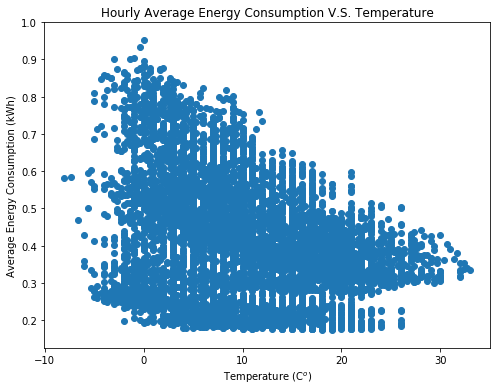

In [164]:
# from IPython.core.display import HTML
# HTML("""
# <style>
# .output_png {
#     display: flex;
#     text-align: center;
#     vertical-align: center;
#     align-items: center;
# }
# </style>
# """)

plt.figure(figsize = (8, 6))
plt.scatter(df_wea1h.TempC, df_Ntou1h.Average)
plt.xlabel(r'Temperature (C$^o$)')
plt.ylabel('Average Energy Consumption (kWh)')
plt.title('Hourly Average Energy Consumption V.S. Temperature')
plt.show()


## But what if we check the relationship between the average energy consumption and outside temperature at each hour of a day. (for the non-TOU case)
For example, 9:00 am average energy consumption and outside temperature over 365 days. 

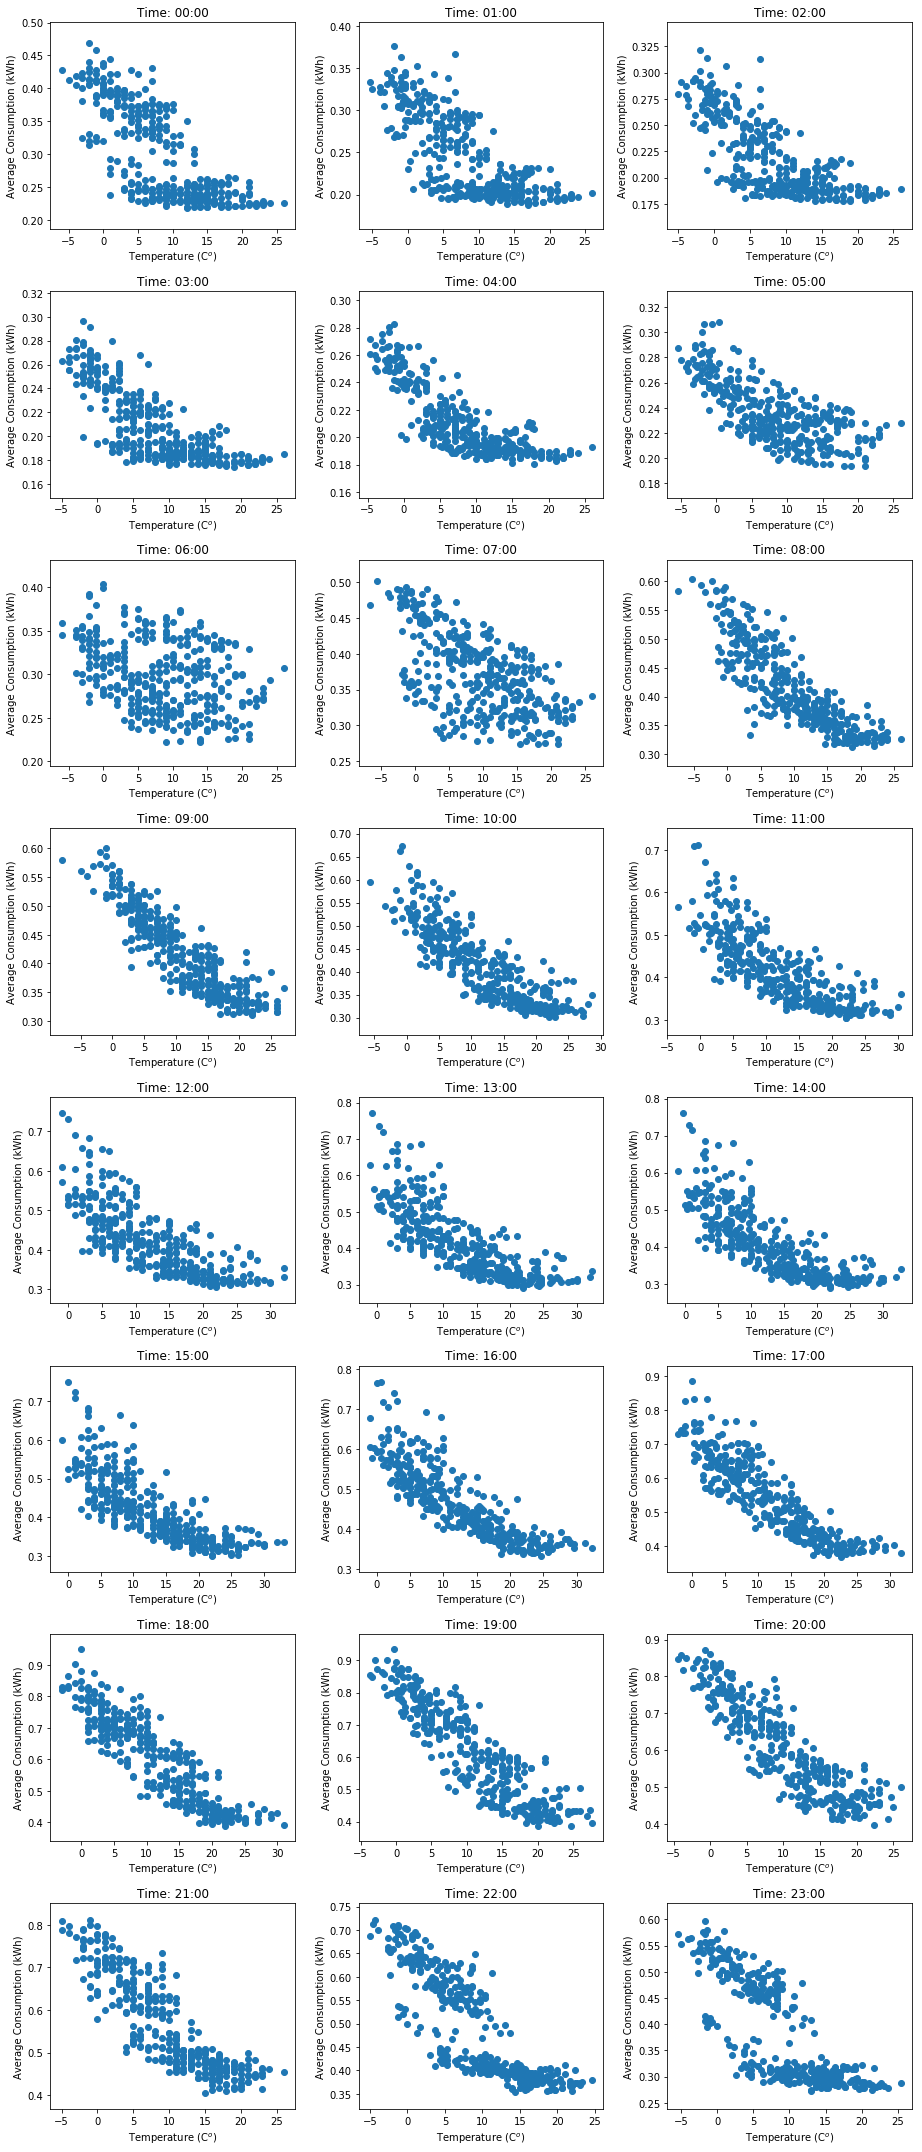

In [182]:
# Show the elements in Average column such that they are hourly energy consumption v.s. temperature over 365 days
fig_all = plt.figure(figsize = (13,30))
for i in range(24):
    ax = fig_all.add_subplot(8, 3, i + 1)
    if i <= 9:
        ax.scatter(df_wea1h.TempC[df_wea1h.GMT.str.contains('0' + str(i) + ':00:00')], df_Ntou1h.Average[df_Ntou1h.GMT.str.contains('0' + str(i) + ':00:00')] )
        ax.set_title('Time: 0' + str(i) + ':00')
        ax.set_xlabel(r'Temperature (C$^o$)')
        ax.set_ylabel('Average Consumption (kWh)')
    else:
        ax.scatter(df_wea1h.TempC[df_wea1h.GMT.str.contains(str(i) + ':00:00')], df_Ntou1h.Average[df_Ntou1h.GMT.str.contains(str(i) + ':00:00')] )
        ax.set_title('Time: ' + str(i) + ':00')
        ax.set_xlabel(r'Temperature (C$^o$)')
        ax.set_ylabel('Average Consumption (kWh)')
plt.tight_layout()

## Let's take a look at the relationship for TOU case

In [183]:
# Let's first create two new columns that is the total and average energy consumptions over all users to df_tou1h
totalHourly = df_tou1h.sum(1)
df_tou1h['Total'] = totalHourly
df_tou1h['Average'] = totalHourly / (df_tou1h.shape[1] - 2) # Delete the first GMT column and the Total column just added
df_tou1h.head()

,GMT,D0000,D0001,D0002,D0003,D0004,D0005,D0006,D0007,D0008,...,D1017,D1018,D1019,D1020,D1021,D1022,D1023,D1024,Total,Average
0,2013-01-01 00:00:00,1.447,0.429,0.451,0.155,0.397,0.106,0.307,0.268,0.390,...,0.502,0.117,0.378,1.143,0.155,0.343,0.176,0.117,424.283,0.413935
1,2013-01-01 01:00:00,0.336,0.377,0.467,0.153,0.227,0.109,0.365,0.300,0.528,...,0.528,0.117,0.399,0.856,0.098,0.278,0.334,0.127,362.458,0.353618
2,2013-01-01 02:00:00,0.244,0.151,0.490,0.154,0.126,0.108,0.060,0.197,0.150,...,0.217,0.310,0.362,0.521,0.083,0.088,0.162,0.136,301.792,0.294431
3,2013-01-01 03:00:00,0.213,0.155,0.580,0.153,0.057,0.109,0.067,0.167,0.151,...,0.206,0.119,0.368,0.470,0.113,0.061,0.127,0.247,268.945,0.262385
4,2013-01-01 04:00:00,0.210,0.121,0.579,0.156,0.061,0.107,0.056,0.144,0.133,...,0.482,0.118,0.354,0.246,0.097,0.058,0.039,0.074,240.464,0.234599


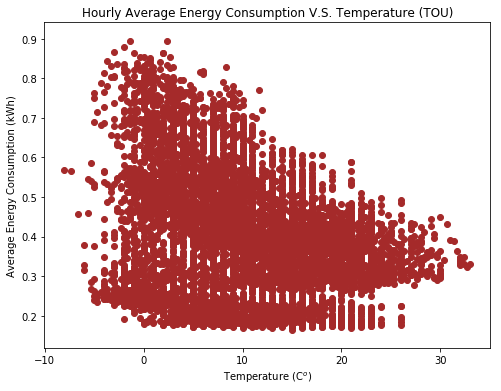

In [196]:
plt.figure(figsize = (8, 6))
plt.scatter(df_wea1h.TempC, df_tou1h.Average, c = 'brown')
plt.xlabel(r'Temperature (C$^o$)')
plt.ylabel('Average Energy Consumption (kWh)')
plt.title('Hourly Average Energy Consumption V.S. Temperature (TOU)')
plt.show()

## Similarly, if we check the relationship between the average energy consumption and outside temperature at each hour of a day. (for the TOU case)
For example, 9:00 am average energy consumption and outside temperature over 365 days. 

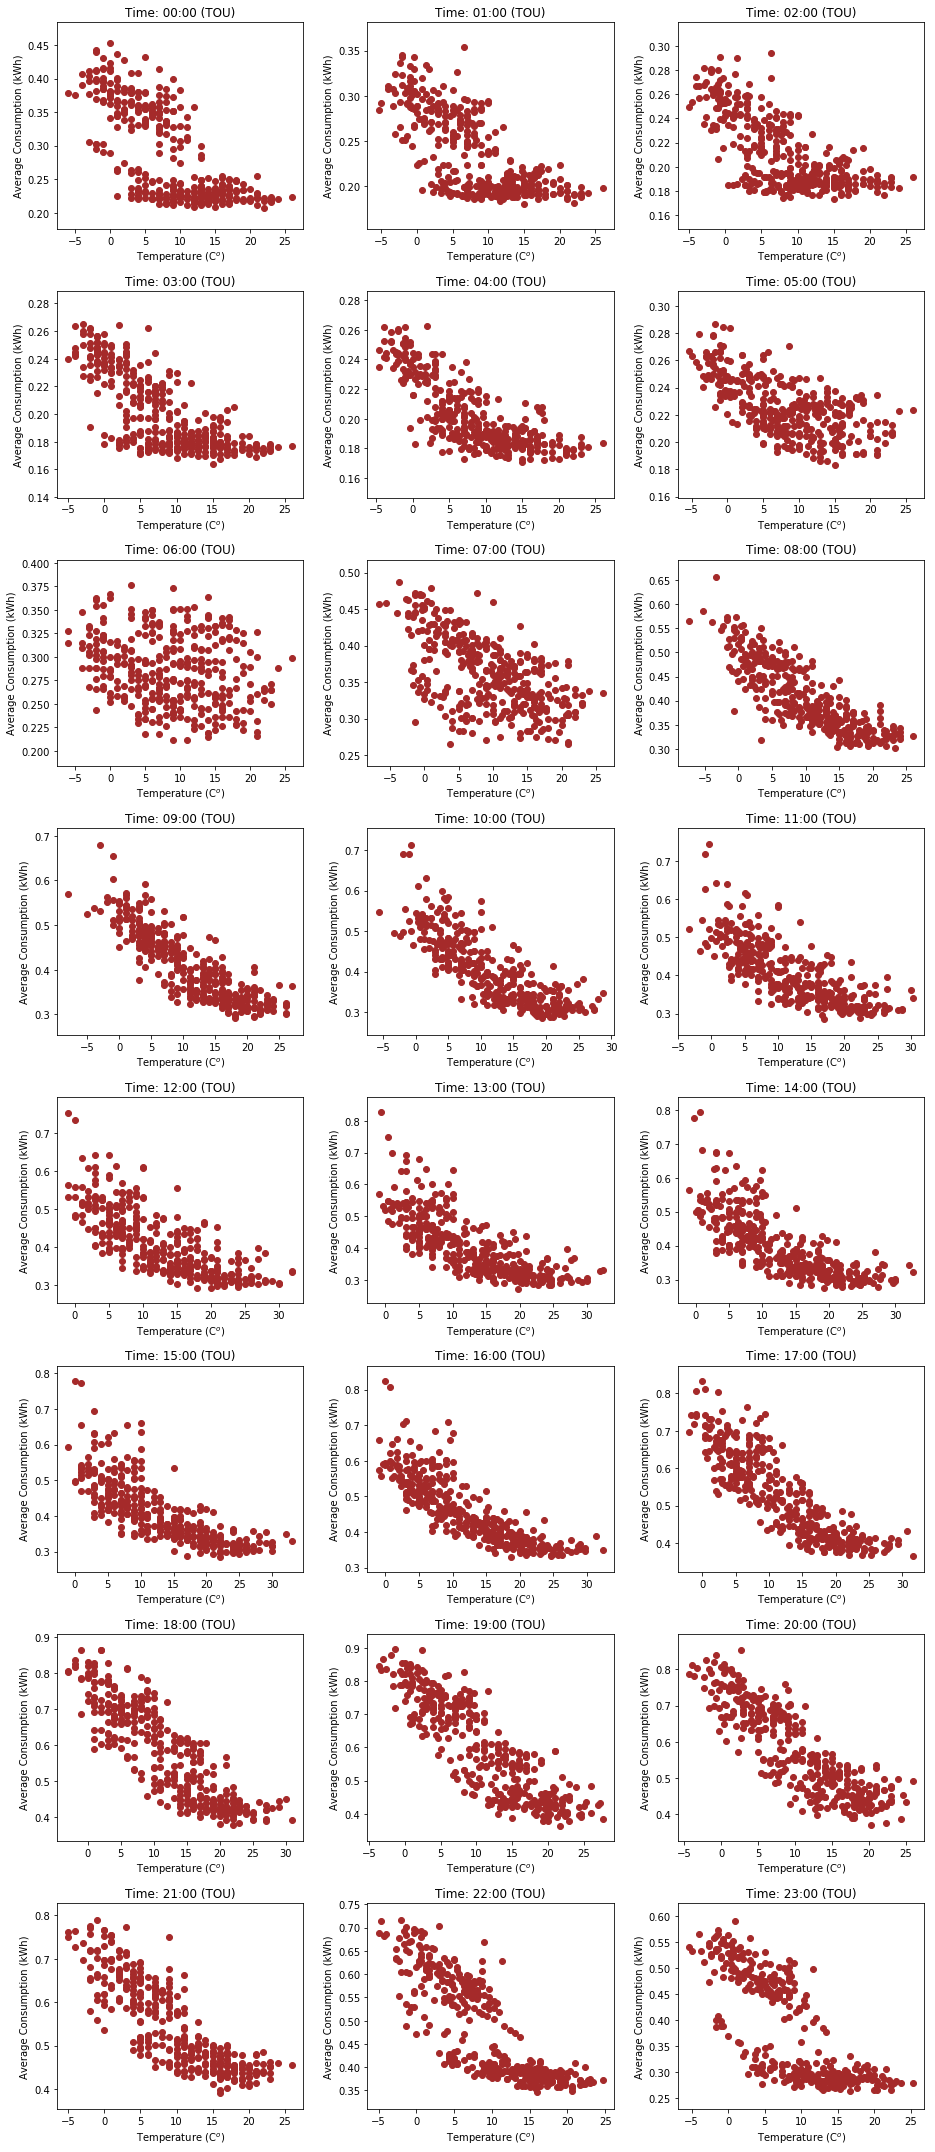

In [207]:
# Show the elements in Average column such that they are hourly energy consumption v.s. temperature over 365 days
fig_all = plt.figure(figsize = (13,30))
for i in range(24):
    ax = fig_all.add_subplot(8, 3, i + 1)
    if i <= 9:
        ax.scatter(df_wea1h.TempC[df_wea1h.GMT.str.contains('0' + str(i) + ':00:00')], df_tou1h.Average[df_tou1h.GMT.str.contains('0' + str(i) + ':00:00')],  c = 'brown' )
        ax.set_title('Time: 0' + str(i) + ':00 (TOU)')
        ax.set_xlabel(r'Temperature (C$^o$)')
        ax.set_ylabel('Average Consumption (kWh)')
    else:
        ax.scatter(df_wea1h.TempC[df_wea1h.GMT.str.contains(str(i) + ':00:00')], df_tou1h.Average[df_tou1h.GMT.str.contains(str(i) + ':00:00')], c = 'brown' )
        ax.set_title('Time: ' + str(i) + ':00 (TOU)')
        ax.set_xlabel(r'Temperature (C$^o$)')
        ax.set_ylabel('Average Consumption (kWh)')
plt.tight_layout()

## Let's compare these two cases, i.e. non-TOU vs TOU

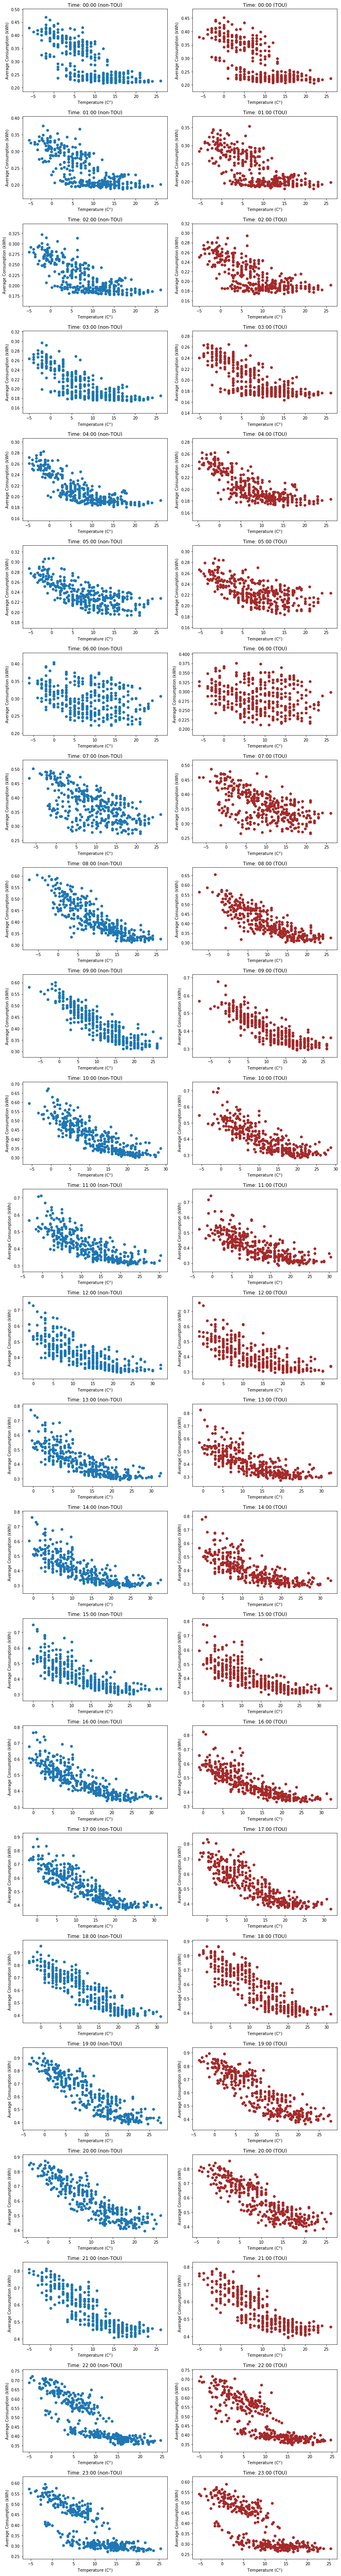

In [236]:
# non-TOU vs TOU in terms of showing the elements in Average column such that they are hourly energy consumption v.s. temperature over 365 days
fig_all = plt.figure(figsize = (12,90))
ax_Ntou = [] # store subplot objects
ax_tou = [] # store subplot objects
for i in range(24):
    ax_Ntou.append(fig_all.add_subplot(24, 2, 2 * i + 1))
    if i <= 9:
        ax_Ntou[-1].scatter(df_wea1h.TempC[df_wea1h.GMT.str.contains('0' + str(i) + ':00:00')], df_Ntou1h.Average[df_Ntou1h.GMT.str.contains('0' + str(i) + ':00:00')] )
        ax_Ntou[-1].set_title('Time: 0' + str(i) + ':00 (non-TOU)')
        ax_Ntou[-1].set_xlabel(r'Temperature (C$^o$)')
        ax_Ntou[-1].set_ylabel('Average Consumption (kWh)')
    else:
        ax_Ntou[-1].scatter(df_wea1h.TempC[df_wea1h.GMT.str.contains(str(i) + ':00:00')], df_Ntou1h.Average[df_Ntou1h.GMT.str.contains(str(i) + ':00:00')] )
        ax_Ntou[-1].set_title('Time: ' + str(i) + ':00 (non-TOU)')
        ax_Ntou[-1].set_xlabel(r'Temperature (C$^o$)')
        ax_Ntou[-1].set_ylabel('Average Consumption (kWh)')
for i in range(24):
    ax_tou.append(fig_all.add_subplot(24, 2, 2 * i + 2))
    if i <= 9:
        ax_tou[-1].scatter(df_wea1h.TempC[df_wea1h.GMT.str.contains('0' + str(i) + ':00:00')], df_tou1h.Average[df_tou1h.GMT.str.contains('0' + str(i) + ':00:00')],  c = 'brown' )
        ax_tou[-1].set_title('Time: 0' + str(i) + ':00 (TOU)')
        ax_tou[-1].set_xlabel(r'Temperature (C$^o$)')
        ax_tou[-1].set_ylabel('Average Consumption (kWh)')
    else:
        ax_tou[-1].scatter(df_wea1h.TempC[df_wea1h.GMT.str.contains(str(i) + ':00:00')], df_tou1h.Average[df_tou1h.GMT.str.contains(str(i) + ':00:00')], c = 'brown' )
        ax_tou[-1].set_title('Time: ' + str(i) + ':00 (TOU)')
        ax_tou[-1].set_xlabel(r'Temperature (C$^o$)')
        ax_tou[-1].set_ylabel('Average Consumption (kWh)')
plt.tight_layout()

In [ ]:
# # Baisc one without creating axes lists, used for future reference.
# for i in range(24):
#     ax = fig_all.add_subplot(24, 2, 2 * i + 1)
#     if i <= 9:
#         ax.scatter(df_wea1h.TempC[df_wea1h.GMT.str.contains('0' + str(i) + ':00:00')], df_Ntou1h.Average[df_Ntou1h.GMT.str.contains('0' + str(i) + ':00:00')] )
#         ax.set_title('Time: 0' + str(i) + ':00 (non-TOU)')
#         ax.set_xlabel(r'Temperature (C$^o$)')
#         ax.set_ylabel('Average Consumption (kWh)')
#     else:
#         ax.scatter(df_wea1h.TempC[df_wea1h.GMT.str.contains(str(i) + ':00:00')], df_Ntou1h.Average[df_Ntou1h.GMT.str.contains(str(i) + ':00:00')] )
#         ax.set_title('Time: ' + str(i) + ':00 (non-TOU)')
#         ax.set_xlabel(r'Temperature (C$^o$)')
#         ax.set_ylabel('Average Consumption (kWh)')
# for i in range(24):
#     ax = fig_all.add_subplot(24, 2, 2 * i + 2)
#     if i <= 9:
#         ax.scatter(df_wea1h.TempC[df_wea1h.GMT.str.contains('0' + str(i) + ':00:00')], df_tou1h.Average[df_tou1h.GMT.str.contains('0' + str(i) + ':00:00')],  c = 'brown' )
#         ax.set_title('Time: 0' + str(i) + ':00 (TOU)')
#         ax.set_xlabel(r'Temperature (C$^o$)')
#         ax.set_ylabel('Average Consumption (kWh)')
#     else:
#         ax.scatter(df_wea1h.TempC[df_wea1h.GMT.str.contains(str(i) + ':00:00')], df_tou1h.Average[df_tou1h.GMT.str.contains(str(i) + ':00:00')], c = 'brown' )
#         ax.set_title('Time: ' + str(i) + ':00 (TOU)')
#         ax.set_xlabel(r'Temperature (C$^o$)')
#         ax.set_ylabel('Average Consumption (kWh)')
# plt.tight_layout()

## The correlation of average consumption and temperature is given below

In [246]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [249]:
# Let's first add correlation of average consumption and temperature on each plot
corr_nTou = []
corr_Tou = []
time_list = []
for i in range(24):
    if i <= 9:
        corr_nTou.append(np.corrcoef(df_wea1h.TempC[df_wea1h.GMT.str.contains('0' + str(i) + ':00:00')], df_Ntou1h.Average[df_Ntou1h.GMT.str.contains('0' + str(i) + ':00:00')])[0][1])
        corr_Tou.append(np.corrcoef(df_wea1h.TempC[df_wea1h.GMT.str.contains('0' + str(i) + ':00:00')], df_tou1h.Average[df_tou1h.GMT.str.contains('0' + str(i) + ':00:00')])[0][1])
        time_list.append('0' + str(i) + ':00:00')
    else:
        corr_nTou.append(np.corrcoef(df_wea1h.TempC[df_wea1h.GMT.str.contains(str(i) + ':00:00')], df_Ntou1h.Average[df_Ntou1h.GMT.str.contains(str(i) + ':00:00')])[0][1])
        corr_Tou.append(np.corrcoef(df_wea1h.TempC[df_wea1h.GMT.str.contains(str(i) + ':00:00')], df_tou1h.Average[df_tou1h.GMT.str.contains(str(i) + ':00:00')])[0][1])
        time_list.append(str(i) + ':00:00')
corr_dict = {}
corr_dict['Time'] = time_list
corr_dict['Non-TOU'] = corr_nTou
corr_dict['TOU'] = corr_Tou
df_corr = pd.DataFrame(corr_dict)
print("The correlation between average consumption and temperature ")
df_corr.style.apply(highlight_max)

The correlation between average consumption and temperature 


,Time,Non-TOU,TOU
0,00:00:00,-0.750935,-0.719511
1,01:00:00,-0.742681,-0.708529
2,02:00:00,-0.749275,-0.701912
3,03:00:00,-0.768477,-0.733397
4,04:00:00,-0.805196,-0.779261
5,05:00:00,-0.686257,-0.618888
6,06:00:00,-0.326638,-0.236381
7,07:00:00,-0.607173,-0.586979
8,08:00:00,-0.856065,-0.842754
9,09:00:00,-0.896261,-0.863859


## Fix the temperature and calculate mean of the data to see if there are difference between TOU and non-TOU case

In [343]:
# Combine the temperature dataframe and non-TOU and TOU data together, to construct 2 new combined dataframe
df_Ntou1h['TempC'] = df_wea1h['TempC'].round()
df_tou1h['TempC'] = df_wea1h['TempC'].round()
df_Ntou1h.groupby('TempC')['Total'].mean()

TempC
-8.0     2422.617000
-7.0     2194.779500
-6.0     1859.903200
-5.0     1922.399167
-4.0     1813.153615
-3.0     1755.657652
-2.0     1853.209401
-1.0     1829.753208
 0.0     2043.474169
 1.0     2165.431803
 2.0     2070.932192
 3.0     1974.060900
 4.0     1906.644273
 5.0     1866.607695
 6.0     1782.732955
 7.0     1798.756414
 8.0     1761.014519
 9.0     1705.896461
 10.0    1681.594872
 11.0    1598.153580
 12.0    1464.691083
 13.0    1506.845987
 14.0    1492.618108
 15.0    1504.134397
 16.0    1480.637633
 17.0    1471.391500
 18.0    1486.999506
 19.0    1477.559386
 20.0    1436.509478
 21.0    1431.052278
 22.0    1422.638348
 23.0    1400.771698
 24.0    1422.030135
 25.0    1479.400702
 26.0    1402.175564
 27.0    1494.972879
 28.0    1512.884583
 29.0    1473.826500
 30.0    1395.854500
 31.0    1617.117667
 32.0    1424.387750
 33.0    1410.085500
Name: Total, dtype: float64

In [338]:
df_NdVSt = df_Ntou1h[df_Ntou1h.GMT.str.contains('0' + str(2) + ':00:00')]
df_NdVSt = pd.DataFrame(df_NdVSt.groupby('TempC')['Total'].mean() / (df_NdVSt.shape[1] - 4))
df_NdVSt = df_NdVSt.reset_index()

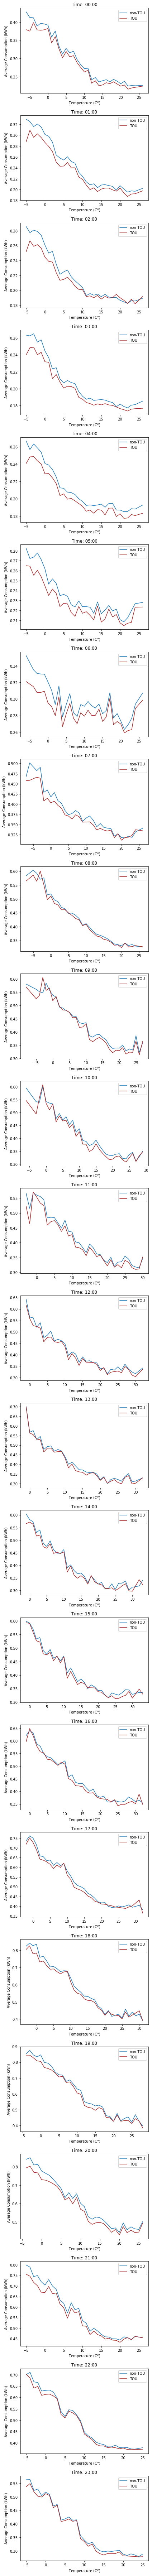

In [359]:
# non-TOU vs TOU in terms of average (over both users and the time) hourly energy consumption v.s. temperature
fig_all = plt.figure(figsize = (6,100))
ax_Ntou = [] # store subplot objects
ax_tou = [] # store subplot objects
for i in range(24):
    ax_Ntou.append(fig_all.add_subplot(24, 1, i+1))
    if i <= 9:
        # calculate the average consumption grouped by different temperatures
        df_NdVSt = df_Ntou1h[df_Ntou1h.GMT.str.contains('0' + str(i) + ':00:00')]
        df_NdVSt = df_NdVSt.groupby('TempC')['Total'].mean() / (df_NdVSt.shape[1] - 4)
        df_NdVSt = df_NdVSt.reset_index()
        ax_Ntou[-1].plot(df_NdVSt.TempC, df_NdVSt.Total, label = 'non-TOU' )
        df_dVSt = df_tou1h[df_tou1h.GMT.str.contains('0' + str(i) + ':00:00')]
        df_dVSt = df_dVSt.groupby('TempC')['Total'].mean() / (df_dVSt.shape[1] - 4)
        df_dVSt = df_dVSt.reset_index()
        ax_Ntou[-1].plot(df_dVSt.TempC, df_dVSt.Total,  c = 'brown', label = 'TOU' )
        ax_Ntou[-1].set_title('Time: 0' + str(i) + ':00')
        ax_Ntou[-1].set_xlabel(r'Temperature (C$^o$)')
        ax_Ntou[-1].set_ylabel('Average Consumption (kWh)')
        ax_Ntou[-1].legend()
    else:
        df_NdVSt = df_Ntou1h[df_Ntou1h.GMT.str.contains(str(i) + ':00:00')]
        df_NdVSt = df_NdVSt.groupby('TempC')['Total'].mean() / (df_NdVSt.shape[1] - 4)
        df_NdVSt = df_NdVSt.reset_index()
        ax_Ntou[-1].plot(df_NdVSt.TempC, df_NdVSt.Total, label = 'non-TOU')
        df_dVSt = df_tou1h[df_tou1h.GMT.str.contains(str(i) + ':00:00')]
        df_dVSt = df_dVSt.groupby('TempC')['Total'].mean() / (df_dVSt.shape[1] - 4)
        df_dVSt = df_dVSt.reset_index()
        ax_Ntou[-1].plot(df_dVSt.TempC, df_dVSt.Total,  c = 'brown', label = 'TOU' )
        ax_Ntou[-1].set_title('Time: ' + str(i) + ':00')
        ax_Ntou[-1].set_xlabel(r'Temperature (C$^o$)')
        ax_Ntou[-1].set_ylabel('Average Consumption (kWh)')
        ax_Ntou[-1].legend()
plt.tight_layout()

## Study the consumer types, lifestyle for 6 am case and the seasonal effect and also .

In [303]:
# Nothingfadsf

## Add linear and polynomial regression, and see which results in a less MSE.

In [301]:
x = [df_wea1h.TempC[df_wea1h.GMT.str.contains('0' + str(0) + ':00:00')].values]
y = df_Ntou1h.Average[df_Ntou1h.GMT.str.contains('0' + str(0) + ':00:00')].values
print(type(x))
print(y)

<class 'list'>
[0.43023556 0.39109705 0.37668991 0.37584663 0.39844452 0.41149916
 0.35869207 0.35871555 0.3533954  0.37241673 0.39163    0.4223295
 0.43443254 0.40025881 0.40504218 0.4126729  0.42810616 0.43034987
 0.45786461 0.46864558 0.42453199 0.41516727 0.41518476 0.42109442
 0.41889768 0.44503019 0.4220901  0.37840259 0.37098275 0.34981884
 0.36652624 0.37109825 0.39595495 0.42719434 0.37638462 0.36515145
 0.37206087 0.38881308 0.38996238 0.4077213  0.422266   0.39475174
 0.38982842 0.3972914  0.39992811 0.38108795 0.38751378 0.38551929
 0.3584347  0.36618859 0.36324587 0.3864982  0.41220968 0.42317901
 0.44050875 0.40647951 0.39776132 0.38949149 0.38872466 0.39364845
 0.4056832  0.42748263 0.36715648 0.3589976  0.33812557 0.32953151
 0.33807021 0.36505224 0.39705775 0.3869087  0.41396909 0.39082818
 0.3809849  0.37809753 0.39134412 0.39736832 0.35998203 0.35478169
 0.36447352 0.3627654  0.3809885  0.41102804 0.43821447 0.40927151
 0.41199856 0.41305895 0.40493506 0.41078864 0.4

In [300]:
x.shape[1]

IndexError: tuple index out of range

In [298]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x, y)
plt.scatter(x, lm.predict([x])[0])

ValueError: Expected 2D array, got 1D array instead:
array=[ 7.  2.  8.  7.  6.  7.  6.  7.  8.  2.  1.  1.  0.  0. -2. -5. -6. -2.
 -1. -2. -2. -3.  0. -1. -4.  1.  5.  2.  9. 12.  6.  4.  2. -1.  6.  5.
  3. -1. -1.  0.  2.  1.  0.  0.  2.  2.  2.  3.  1.  1.  1. -1. -2. -3.
 -2. -2.  3.  3.  1.  0.  0.  4.  0.  3.  6.  8.  8.  7.  1. -1. -2.  0.
 -3. -1.  4.  3.  0.  1.  1.  0.  2.  1.  0. -1. -1. -1. -4. -1. -3.  3.
 -3. -2. -2. -1. -1. -2.  0.  2.  1.  1.  4.  5.  4. 10.  9.  7.  7.  9.
  4.  5.  3.  4.  9. 10. 12.  8.  3.  1.  5.  4.  1.  4.  6.  6.  4. 11.
  9.  9.  8.  9.  9.  4. 10.  4.  8.  3.  4.  5.  7. 12. 14.  7.  5.  3.
  3.  6.  7.  8.  6.  9. 10. 10.  8.  7.  5.  6.  7.  8.  8.  9.  6.  7.
 14. 13. 10. 13.  9. 10. 12. 15. 15. 13. 12. 12.  9.  8. 10. 12. 12. 14.
 13. 12. 11. 13. 12. 13. 13. 16. 14. 13. 14. 10. 10. 13. 18. 18. 17. 18.
 17. 17. 15. 13. 16. 19. 17. 15. 13. 16. 16. 15. 13. 14. 16. 21. 15. 13.
 15. 14. 14. 12. 14. 14. 13. 13. 12. 12. 15. 20. 18. 21. 20. 22. 22. 23.
 23. 20. 19. 21. 23. 22. 21. 20. 19. 18. 21. 23. 24. 26. 17. 16. 15. 15.
 13. 14. 16. 18. 13. 13. 12. 11. 13. 13. 16. 15. 21. 21. 19. 19. 17. 16.
 16. 16. 17. 15. 17. 17. 17. 17. 16. 17. 18. 14.  9. 12. 12. 10. 10. 11.
 11. 14. 14. 15. 15. 15. 16. 15. 14. 16. 15. 14. 13.  9. 10. 13. 13. 11.
  9.  7.  9. 11. 10.  9.  8.  5. 10. 11.  7.  7.  5.  6.  7.  8.  3.  3.
  4.  4.  5.  4.  3.  2.  7.  6.  7.  4.  6.  5.  4.  5.  5.  4.  5.  7.
  7.  7.  5.  7.  9.  7. 10. 11.  7.  8.  5.  5. 10.  7.  9.  8.  5.  4.
  9.  6.  3.  8.  9.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [256]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(df_wea1h.TempC[df_wea1h.GMT.str.contains('0' + str(0) + ':00:00')].values, df_Ntou1h.Average[df_Ntou1h.GMT.str.contains('0' + str(0) + ':00:00')].values )
plt.plot(df_wea1h.TempC[df_wea1h.GMT.str.contains('0' + str(0) + ':00:00')].values, lm.predict(df_wea1h.TempC[df_wea1h.GMT.str.contains('0' + str(0) + ':00:00')].values))

ValueError: Expected 2D array, got 1D array instead:
array=[ 7.  2.  8.  7.  6.  7.  6.  7.  8.  2.  1.  1.  0.  0. -2. -5. -6. -2.
 -1. -2. -2. -3.  0. -1. -4.  1.  5.  2.  9. 12.  6.  4.  2. -1.  6.  5.
  3. -1. -1.  0.  2.  1.  0.  0.  2.  2.  2.  3.  1.  1.  1. -1. -2. -3.
 -2. -2.  3.  3.  1.  0.  0.  4.  0.  3.  6.  8.  8.  7.  1. -1. -2.  0.
 -3. -1.  4.  3.  0.  1.  1.  0.  2.  1.  0. -1. -1. -1. -4. -1. -3.  3.
 -3. -2. -2. -1. -1. -2.  0.  2.  1.  1.  4.  5.  4. 10.  9.  7.  7.  9.
  4.  5.  3.  4.  9. 10. 12.  8.  3.  1.  5.  4.  1.  4.  6.  6.  4. 11.
  9.  9.  8.  9.  9.  4. 10.  4.  8.  3.  4.  5.  7. 12. 14.  7.  5.  3.
  3.  6.  7.  8.  6.  9. 10. 10.  8.  7.  5.  6.  7.  8.  8.  9.  6.  7.
 14. 13. 10. 13.  9. 10. 12. 15. 15. 13. 12. 12.  9.  8. 10. 12. 12. 14.
 13. 12. 11. 13. 12. 13. 13. 16. 14. 13. 14. 10. 10. 13. 18. 18. 17. 18.
 17. 17. 15. 13. 16. 19. 17. 15. 13. 16. 16. 15. 13. 14. 16. 21. 15. 13.
 15. 14. 14. 12. 14. 14. 13. 13. 12. 12. 15. 20. 18. 21. 20. 22. 22. 23.
 23. 20. 19. 21. 23. 22. 21. 20. 19. 18. 21. 23. 24. 26. 17. 16. 15. 15.
 13. 14. 16. 18. 13. 13. 12. 11. 13. 13. 16. 15. 21. 21. 19. 19. 17. 16.
 16. 16. 17. 15. 17. 17. 17. 17. 16. 17. 18. 14.  9. 12. 12. 10. 10. 11.
 11. 14. 14. 15. 15. 15. 16. 15. 14. 16. 15. 14. 13.  9. 10. 13. 13. 11.
  9.  7.  9. 11. 10.  9.  8.  5. 10. 11.  7.  7.  5.  6.  7.  8.  3.  3.
  4.  4.  5.  4.  3.  2.  7.  6.  7.  4.  6.  5.  4.  5.  5.  4.  5.  7.
  7.  7.  5.  7.  9.  7. 10. 11.  7.  8.  5.  5. 10.  7.  9.  8.  5.  4.
  9.  6.  3.  8.  9.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## Next, we can add one more filtering condition, check the hourly relation in a specific day of a week over the whole year.

## Scaterplot the consumption-weather relationship for the non-TOU case

AttributeError: 'AxesSubplot' object has no attribute 'xlabel'

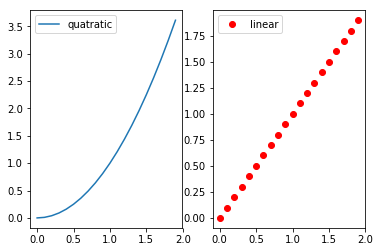

In [92]:
x = np.arange(0, 2, 0.1)
# plt.plot(x, x, label = 'linear')
# plt.plot(x, x**2, label = 'quadratic')
fig, ax = plt.subplots(1,2)
ax[1].plot(x, x, 'ro',label = 'linear')
ax[1].legend()
ax[0].plot(x, x**2, label = 'quatratic')
ax[0].legend()
ax[0].xlabel('X axis')
ax[0].ylabel('Y axis')
plt.show()

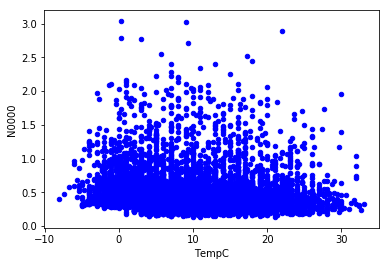

In [40]:
# We first right join the df_wea1h to df_Ntou1h.
df_touWea1h = pd.merge(df_Ntou1h, df_wea1h, on = 'GMT', how = 'right')

ax1 = df_touWea1h.plot.scatter(x = 'TempC', y = 'N0000', c = 'Blue')

### (Just a reminder, for Matplotlib the pandas data object may or may not work as intended, so it's better to convert array to np.array objects or np.ma.maksed_array objects as inputs.)